**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Here loading the MNOST data from keras.datasets

Importing all requred dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
# loading the data
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# checking for type and shape of data
print(type(X_train))
print(X_train.shape,Y_train.shape,X_test.shape,Y_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (60000,)


As can be seen from shape that image is Grayscale

Training data=60000 Images
Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
# checking Unique label of the training data and the test data

# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
# Scaling the values for better accuracy,faster convergence and improving numerical stability also balanced learning
# we can do one hot encodeing also but here using maximum pixel intensity
X_train=X_train/255
X_test=X_test/255

### Building the Neural Network

In [9]:
# layers for Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [10]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# training the Neural Network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3010 - accuracy: 0.9124
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1440 - accuracy: 0.9570
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1059 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9847
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0442 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.032

Training Accuracy = 98.9%

**Accuracy on Test data:**

In [17]:
# Checking Accuracy on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print('The accuracy on the test data is : ',accuracy)




313/313 [==============================] - 1s 2ms/step - loss: 0.1031 - accuracy: 0.9726
The accuracy on the test data is :  0.972599983215332


Accuracy in the test data is: 97.25%

(10000, 28, 28)


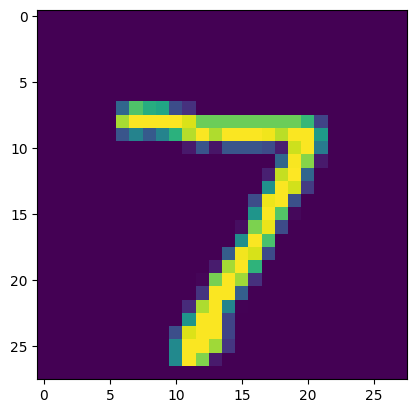

In [21]:
# Checking the shape of the test data, also checking the image in the test data
print(X_test.shape)
plt.imshow(X_test[0])
plt.show()

In [25]:
# checking the prediction
Y_pred=model.predict(X_test)
print(Y_pred.shape)
# Checking the predicted label of the first test data
print(Y_pred[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[7.2033882e-02 5.6925020e-03 7.8994429e-01 3.4812859e-01 4.7636900e-06
 6.6828793e-03 2.7850912e-05 9.9999267e-01 4.1410094e-04 8.1691369e-02]


In [29]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels[0])  # first predicted label

7


Here for notation purpose

Y_test --> True labels

Y_pred_labels --> Predicted Labels

**Confusion matrix and its heat map**

tf.Tensor(
[[ 957    0    1    3    1    9    3    0    4    2]
 [   0 1124    2    1    0    2    1    0    5    0]
 [   1    0 1015    5    1    0    1    5    4    0]
 [   0    0    6  978    0   17    0    3    5    1]
 [   2    1    3    0  944    1    2    4    2   23]
 [   1    0    0    4    0  883    1    0    1    2]
 [   4    3    2    1    4   15  923    0    5    1]
 [   1    9    9    1    0    0    0  996    7    5]
 [   1    0    6   10    2   12    0    3  936    4]
 [   1    5    0    4    9    7    1    4    8  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

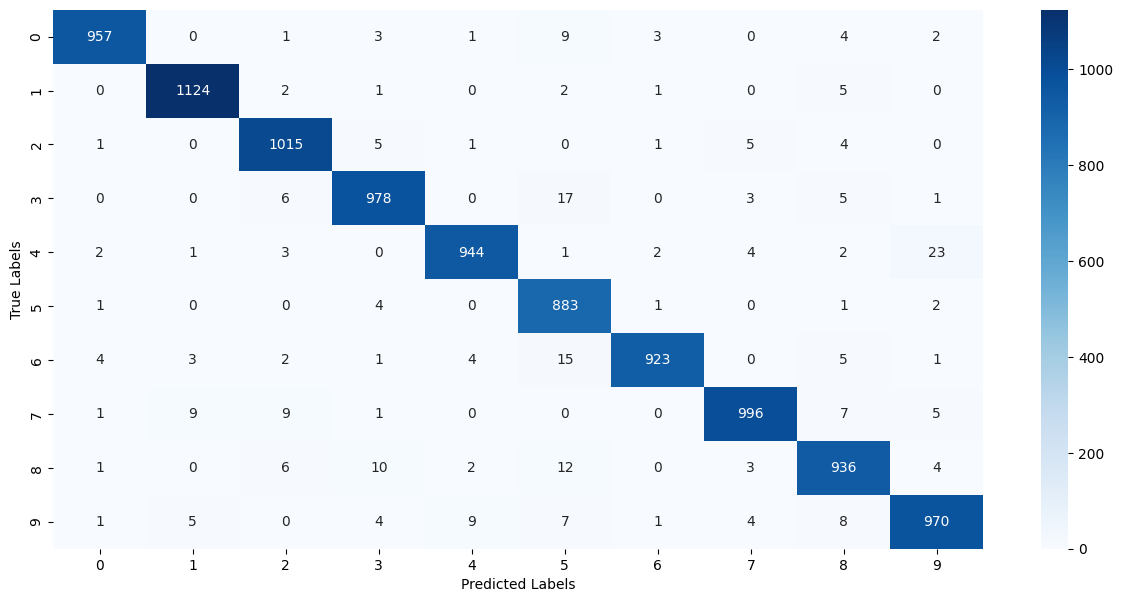

In [34]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)
# printing heat map for confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a predictive system**

Path of the image to be predicted: /content/6.webp


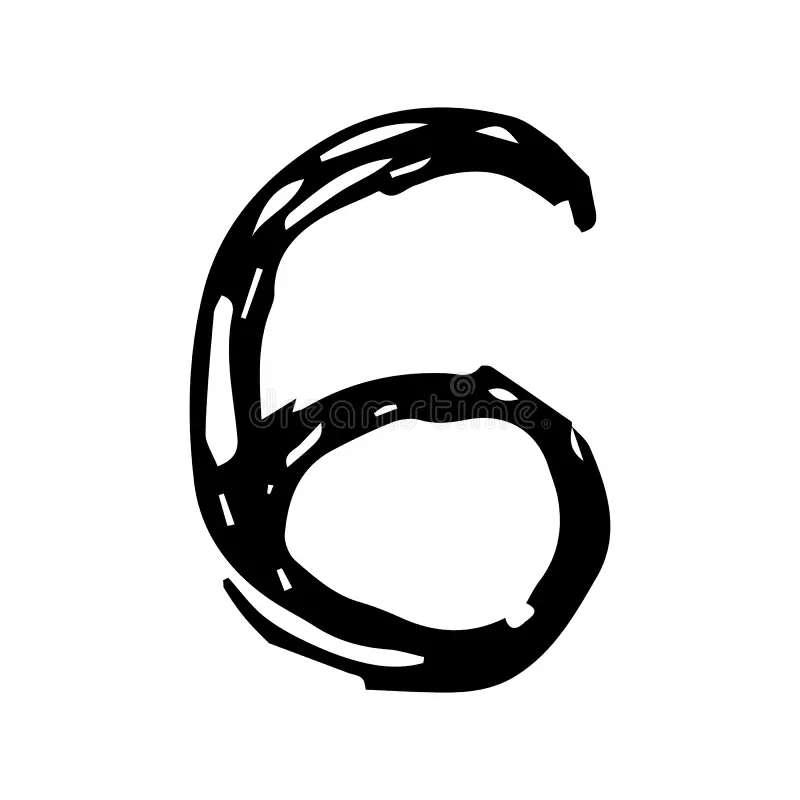

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  5


In [43]:
# Checking accuracy on Test data
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)
